## Dataset Overview
This dataset provides daily weather information for Australia, dating back to 2008. Each observation represents a single day in a given location. The data provided relates to weather conditions throughout the day such as wind and wind direction, temperature, humidity, pressure, whether it rained today and whether or not it rained the following day.

The dataset contains **145,460 observations across 24 columns** and can be found at the link below:

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
%matplotlib inline

## Read dataset in and begin investigating its properties

In [2]:
weather = pd.read_csv('weatherAUS.csv')

In [3]:
weather.shape

(145460, 24)

In [4]:
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [8]:
pd.options.display.max_rows = 999
weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [7]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142193.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2.360682
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,371.000000


## Exploratory Analysis

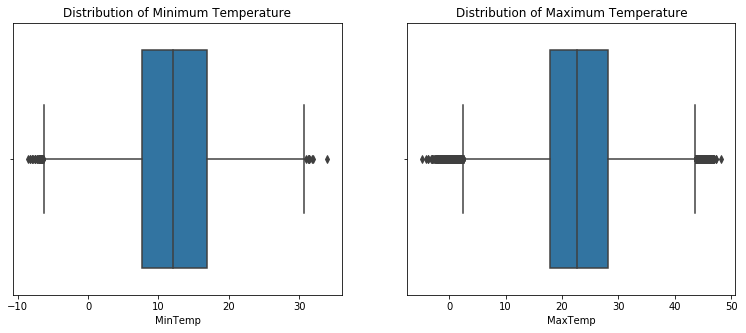

count    143975.000000
mean         12.194034
std           6.398495
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.900000
max          33.900000
Name: MinTemp, dtype: float64
count    144199.000000
mean         23.221348
std           7.119049
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64


In [19]:
#Start with MinTemp and MaxTemp

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.boxplot(x=weather["MinTemp"])
plt.title('Distribution of Minimum Temperature')

plt.subplot(1,3,2)
sns.boxplot(x=weather["MaxTemp"])
plt.title('Distribution of Maximum Temperature')
plt.show()

print(weather['MinTemp'].describe())
print(weather['MaxTemp'].describe())

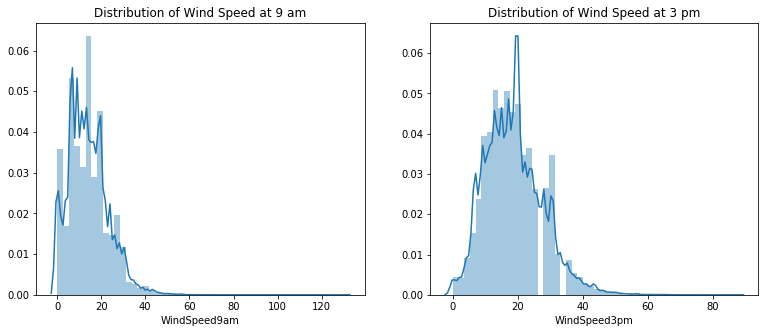

In [21]:
#Next look at Wind Speed

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(weather['WindSpeed9am'].dropna())
plt.title('Distribution of Wind Speed at 9 am')

plt.subplot(1,3,2)
sns.distplot(weather['WindSpeed3pm'].dropna())
plt.title('Distribution of Wind Speed at 3 pm')
plt.show()

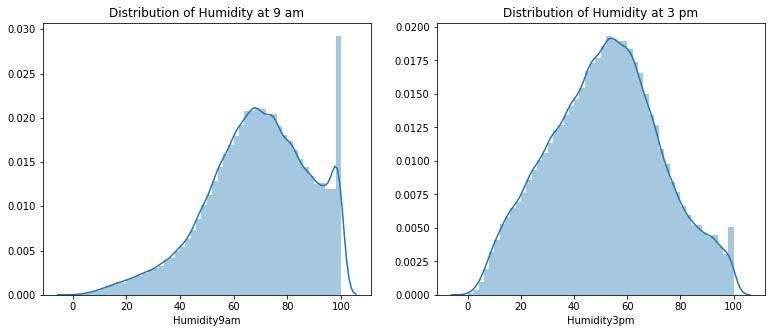

In [22]:
#Next look at Humidity

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(weather['Humidity9am'].dropna())
plt.title('Distribution of Humidity at 9 am')

plt.subplot(1,3,2)
sns.distplot(weather['Humidity3pm'].dropna())
plt.title('Distribution of Humidity at 3 pm')
plt.show()

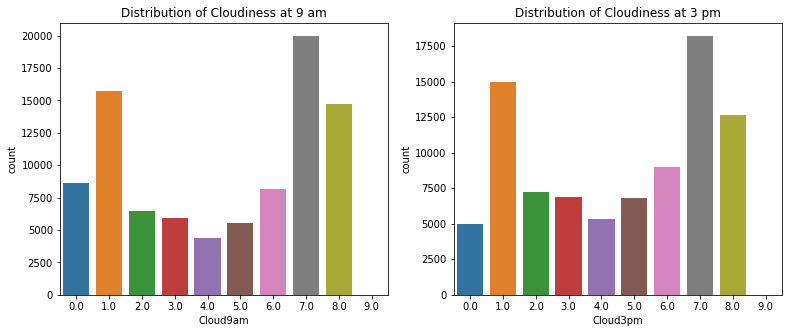

In [24]:
#Finally, look at cloudiness

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.countplot(x=weather['Cloud9am'].dropna(), data=weather)
plt.title('Distribution of Cloudiness at 9 am')

plt.subplot(1,3,2)
sns.countplot(x=weather['Cloud3pm'].dropna(), data=weather)
plt.title('Distribution of Cloudiness at 3 pm')
plt.show()

## Data Cleaning

In [29]:
#Determine missing values across dataframe

missing_values_count = weather.isnull().sum()
print(missing_values_count)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RISK_MM           3267
RainTomorrow      3267
dtype: int64


## Feature Selection / Engineering

## Run Initial Models